## Neural Network with tensorflow

langkah membuat neural network

- siapkan Data
  - open data
  - preprocessing
  - feature engineering

- buat arsitektur neural network
  - Sequential API
  - Functional API
- Compile (translate kode ke bahasa mesin) Model Neural netwok
  - Tentukan Loss yang digunakan
  - Tentukan Optimizer digunakan
  - Tentukan Metrik yang ingin dimonitor
  - Callback
- Training

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.1,random_state=46)

In [5]:
num_col = ['Pclass', 'Age', 'SibSp', 'Parch','Fare']
cat_col = ['Sex']

In [6]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])


In [7]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(801, 7)
(90, 7)
(134, 7)


## Buat arsitektur NN

In [9]:
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

'''
data_in = Input(shape=(7,))
hidden_1 = Dense(4, activation='relu')(data_in)
out = Dense(1,activation='sigmoid')(hidden_1)

model = Model(Inputs=data_in,outputs=out)
'''


# buat arsitekturnya
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,))) # hidden layer 1
model.add(Dense(1, activation='sigmoid')) # output layer

# compile
model.compile(loss="binary_crossentropy",
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# training
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
26/26 [==============================] - 19s 18ms/step - loss: 0.7850 - accuracy: 0.3933 - val_loss: 0.7107 - val_accuracy: 0.4778
Epoch 2/300
26/26 [==============================] - 0s 17ms/step - loss: 0.7550 - accuracy: 0.4532 - val_loss: 0.6890 - val_accuracy: 0.5667
Epoch 3/300
26/26 [==============================] - 0s 6ms/step - loss: 0.7308 - accuracy: 0.5406 - val_loss: 0.6713 - val_accuracy: 0.6444
Epoch 4/300
26/26 [==============================] - 0s 6ms/step - loss: 0.7111 - accuracy: 0.5793 - val_loss: 0.6561 - val_accuracy: 0.6667
Epoch 5/300
26/26 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.6217 - val_loss: 0.6407 - val_accuracy: 0.7222
Epoch 6/300
26/26 [==============================] - 0s 7ms/step - loss: 0.6749 - accuracy: 0.6392 - val_loss: 0.6279 - val_accuracy: 0.7333
Epoch 7/300
26/26 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.6604 - val_loss: 0.6155 - val_accuracy: 0.7111
Epoch 8/30

## Binary class
- Output Layer : 
  - Neuron 1
  - Activation "Sigmoid"
  - Loss : "binary crossentropy"

## mutliclasss
- Output Layer:
  - Neuron : n
  - Activation "Softmax"
  - loss " Categorical crossentropy"

## Regressi
- Output Layer:
  - neuron 1
  - activation =
  - loss "mean squared error"

  

In [10]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.784982,0.393258,0.710675,0.477778
1,0.754973,0.453184,0.689042,0.566667
2,0.730815,0.540574,0.671318,0.644444
3,0.711097,0.579276,0.656127,0.666667
4,0.692369,0.621723,0.640708,0.722222
...,...,...,...,...
295,0.415467,0.827715,0.430484,0.811111
296,0.415254,0.830212,0.430889,0.811111
297,0.415097,0.830212,0.430510,0.811111
298,0.415057,0.827715,0.430771,0.811111


<AxesSubplot:>

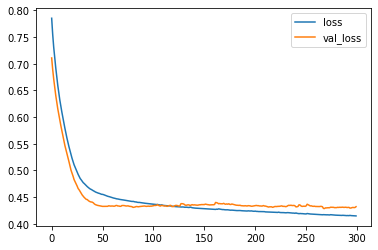

In [11]:
metrics[['loss','val_loss']].plot()

In [12]:
from sklearn.metrics import classification_report
import numpy as np


y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        76
           1       0.90      0.74      0.81        58

    accuracy                           0.85       134
   macro avg       0.86      0.84      0.84       134
weighted avg       0.86      0.85      0.85       134



In [13]:
import tensorflow as tf
len(tf.config.list_physical_devices('GPU'))

1

In [14]:
#save model
model.save("nn_titanic")

INFO:tensorflow:Assets written to: nn_titanic\assets


In [15]:
from tensorflow.keras.models import load_model

model_titanic = load_model("nn_titanic")

In [16]:
res_model = model_titanic.predict(X_test)

In [17]:
model_titanic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 0 - 255
x_train = x_train / 255.0
x_test = x_test / 255.0



11501568/11490434 [==============================] - 5s 0us/step


In [19]:
import matplotlib.pyplot as plt

def show_image(image):
  plt.imshow(image,cmap="binary")

None
5


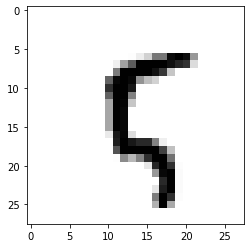

In [20]:
print(show_image(x_train[100]))
print(y_train[100])

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 0 - 255
# x_train = x_train / 255.0
# x_test = x_test / 255.0



In [21]:

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1,random_state=46)

In [22]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [23]:
# siapkan label dengan one hot encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [24]:
x_train.shape

(54000, 28, 28)

In [25]:
28*28

784

In [26]:
# functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

# arsitektur
data_in = Input(shape=(28,28))
data_flat = Flatten()(data_in)
data_drop = Dropout(0.25)(data_flat)
hidden_1 = Dense(256, activation='elu')(data_drop)
hidden1_drop = Dropout(0.25)(hidden_1)
hidden_2 = Dense(32, activation='elu')(hidden1_drop)
hidden2_drop = Dropout(0.25)(hidden_2)
out = Dense(10, activation='softmax')(hidden2_drop)

model = Model(inputs=data_in, outputs=out)

# compile
model.compile(loss="categorical_crossentropy",
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# training
history = model.fit(x_train, y_train_ohe, epochs=30, validation_data=(x_val,y_val_ohe))

Epoch 1/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4539 - accuracy: 0.8603 - val_loss: 0.1718 - val_accuracy: 0.9455
Epoch 2/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2746 - accuracy: 0.9170 - val_loss: 0.1237 - val_accuracy: 0.9613
Epoch 3/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2228 - accuracy: 0.9316 - val_loss: 0.1100 - val_accuracy: 0.9688
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1956 - accuracy: 0.9402 - val_loss: 0.0862 - val_accuracy: 0.9732
Epoch 5/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1766 - accuracy: 0.9465 - val_loss: 0.0798 - val_accuracy: 0.9728
Epoch 6/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1585 - accuracy: 0.9521 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 7/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1518 - accuracy: 0.9544 - val_loss: 0.0703 - val_accuracy:

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

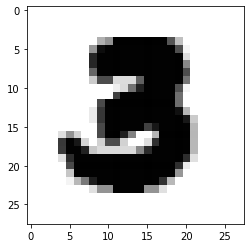

In [28]:
new_data = x_test[200]
show_image(new_data)

In [29]:
new_data.shape

(28, 28)

In [30]:
res = model.predict(new_data.reshape(1, 28, 28))
res.argmax()

3

In [31]:

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

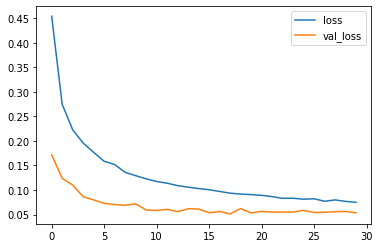

In [33]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics[['loss','val_loss']].plot()

semakin 

RNN
dropout rate 0.2 - 0.3


CNN
dropout rate 0.4 - 0.5